## Test the recovery of curved-sky power spectra with Gaussian mocks

In [1]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
from astropy.io import fits
from astropy.table import Table, vstack
import healpy as hp
from pixell import enmap
import pymaster as nmt
import copy

# to use matplotlib with jupiter
import matplotlib as mpl
mpl.rc('text', usetex=False)
mpl.rc('font', family='serif')
%matplotlib inline

In [2]:
nSide = 2014

In [4]:
nmt.synfast_spherical?

Signature: nmt.synfast_spherical(nside, cls, spin_arr, beam=None, seed=-1, wcs=None)
Docstring:
Generates a full-sky Gaussian random field according to a given     power spectrum. This function should produce outputs similar to     healpy's synfast.

:param int nside: HEALpix resolution parameter. If you want         rectangular pixel maps, ignore this parameter and pass a         WCS object as `wcs` (see below).
:param array-like cls: array containing power spectra. Shape         should be [n_cls][n_ell], where n_cls is the number of power         spectra needed to define all the fields. This should be         n_cls = n_maps * (n_maps + 1) / 2, where n_maps is the total         number of maps required (1 for each spin-0 field, 2 for each         spin-2 field). Power spectra must be provided only for the         upper-triangular part in row-major order (e.g. if n_maps is         3, there will be 6 power spectra ordered as         [1-1,1-2,1-3,2-2,2-3,3-3].
:param array-like spin_arr: a

In [10]:
clArray = np.ones((1,3 *nSide))

In [12]:
# Generate a mock healpy map
maps = nmt.synfast_spherical(nSide, clArray, spin_arr=np.array([0]), seed=-1, beam=True)

ValueError: Something is wrong with your input arrays

In [13]:
path = '/global/cscratch1/sd/sferraro/SOxpipe/input_cl/ncl_kk.txt'

noisecls = np.genfromtxt(path)

In [15]:
noisecls.shape

(9999, 2)

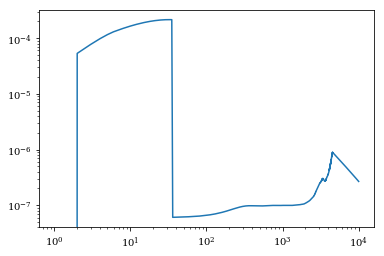

In [16]:
plt.loglog(noisecls[:,0], noisecls[:,1])
plt.show()

In [20]:
print np.mean(noisecls[1:,0]-noisecls[:-1,0])
print np.var(noisecls[1:,0]-noisecls[:-1,0])

1.0
0.0


In [32]:
np.sum(noisecls[:,1]<=0.)

1

In [33]:
noisecls[:,1]

array([0.00000000e+00, 5.31889711e-05, 7.69571344e-05, ...,
       2.67117342e-07, 2.67074912e-07, 2.67032493e-07])

In [21]:
pathcls = '/global/cscratch1/sd/sferraro/SOxpipe/input_cl/cl_kk.txt'

cls = np.genfromtxt(pathcls)

In [23]:
cls.shape

(9999, 2)

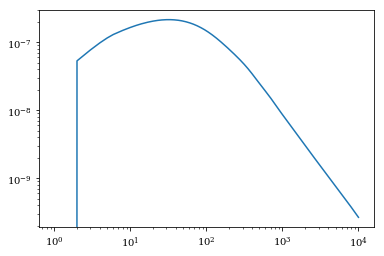

In [25]:
plt.loglog(cls[:,0], cls[:,1])
plt.show()

In [26]:
cls[:,1]

array([0.00000000e+00, 5.31889711e-08, 7.69571344e-08, ...,
       2.67117342e-10, 2.67074912e-10, 2.67032493e-10])

In [27]:
print np.mean(cls[1:,0]-cls[:-1,0])
print np.var(cls[1:,0]-cls[:-1,0])

1.0
0.0


In [29]:
np.sum(cls<0.)

0